In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import sklearn

train_y = []
count = 0
with open('CIKM2017_train/train.txt') as fhdl:
    for line in fhdl:
        count += 1
        if count % 50 == 0:
            print (float(count) / 10000,end=' '),
        linenum,label,datas = line.strip().split(',')
        label = float(label)
        datas = np.asarray(datas.split(" "),dtype=np.int)
        datas[datas < 0] = 0
        datas = np.asarray(datas,dtype=np.uint8)
        train_x.append(datas)
        train_y.append(label)

In [3]:
import pickle
train_x,train_y = pickle.load(open('datauint8.pkl','rb'))

In [4]:
len(train_x),len(train_y)

(10000, 10000)

In [5]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y,test_size=0.2,random_state=1120)

In [6]:
# do not use this now, will cause future shuffle slow
train_x = np.asarray(train_x,dtype=np.uint8)
test_x = np.asarray(test_x,dtype=np.uint8)

In [7]:
len(train_x),len(train_y),test_x.shape,len(test_y)

(8000, 8000, (2000, 612060), 2000)

In [11]:
import pickle
#pickle.dump((train_x,train_y),open('data.pkl','wb'))

In [12]:
import sys
sys.getsizeof(train_x[0]) * 10000

960000

In [13]:
len(train_x),test_x.shape

(8000, (2000, 612060))

In [8]:
train_y = [1 if i >= 20 else 0 for i in train_y  ]

In [9]:
test_y = [1 if i >= 20 else 0 for i in test_y  ]

# Logistic regression to split data as >= 20 and < 20

In [ ]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
itertion 40 656.117 (0.5, 0.55959266)
shuffleing ...
itertion 80 586.144 (0.55959266, 0.61323798)
itertion 120 551.246 (0.61323798, 0.63766861)
shuffleing ...
itertion 160 576.606 (0.63766861, 0.64245129)
itertion 200 638.061 (0.64245129, 0.64118272)
shuffleing ...
itertion 240 544.944 (0.64118272, 0.65306818)
itertion 280 563.815 (0.65306818, 0.65521824)
shuffleing ...
itertion 320 598.007 (0.65521824, 0.65608406)
itertion 360 465.461 (0.65608406, 0.66346192)
shuffleing ...
itertion 400 494.872 (0.66346192, 0.66928351)
itertion 440 553.856 (0.66928351, 0.6676082)
shuffleing ...
itertion 480 481.567 (0.6676082, 0.67257905)
itertion 520 466.14 (0.67257905, 0.67638451)
shuffleing ...
itertion 560 509.345 (0.67638451, 0.67667329)
itertion 600 439.857 (0.67667329, 0.68019283)
shuffleing ...
itertion 6

# tensorflow's linear regression

In [ ]:
tf.contrib.learn.LogisticRegressor

# Logistic regression with L2 regulation

In [32]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) + tf.reduce_sum(tf.square(W)) / 2
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        pw = sess.run(W)
        print pw
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
itertion 40 677.817 (0.5, 0.59133518)
[[  3.70351472e-07]
 [  4.14065170e-07]
 [  2.94666080e-07]
 ..., 
 [ -4.44581161e-07]
 [ -4.26739888e-07]
 [ -5.02523903e-07]]


KeyboardInterrupt: 

In [54]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W1 = tf.Variable(tf.random_normal([n_input,10],stddev=1.0/n_input),tf.float32)
W2 = tf.Variable(tf.random_normal([10,1],stddev=1.0/n_input),tf.float32)
b1 = tf.Variable(tf.zeros([10]),tf.float32)
b2 = tf.Variable([0.0],tf.float32)
y1 = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(X),W1),b1)
)
y = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(y1),W2),b2)
)
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = y1,y
max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
#train_step = tf.train.GradientDescentOptimizer(0.00003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        print(debug_val)
        weights_dic[i] = (sess.run(W1),sess.run(W2),sess.run(b1),sess.run(b2))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


shuffleing ...
itertion 0 693.147 (0.0, 0.5)
(array([[ 0.5136044 ,  0.50802714,  0.49657726, ...,  0.52290815,
         0.52888525,  0.47885343],
       [ 0.57239354,  0.50408453,  0.54045767, ...,  0.52862555,
         0.49819279,  0.48902223],
       [ 0.54862732,  0.51271766,  0.50438553, ...,  0.53175998,
         0.50536907,  0.49551305],
       ..., 
       [ 0.55407554,  0.51917845,  0.49668944, ...,  0.5076161 ,
         0.52474838,  0.47016791],
       [ 0.5072298 ,  0.48702788,  0.50005656, ...,  0.52026439,
         0.53776526,  0.48651916],
       [ 0.51337868,  0.48788637,  0.51672179, ...,  0.50389409,
         0.49963972,  0.48899737]], dtype=float32), array([[ 0.49999905],
       [ 0.49999899],
       [ 0.49999905],
       ..., 
       [ 0.49999905],
       [ 0.49999905],
       [ 0.49999905]], dtype=float32))
itertion 40 693.138 (0.5, 0.5)
(array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.66973774e-19,   1.00000000e+00,   1.00000000e+00],


KeyboardInterrupt: 

In [10]:
onehoty = np.zeros([len(train_y),2])

In [11]:
for num,i in enumerate(train_y):
    onehoty[num][i] = 1

In [12]:
onehoty

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [13]:
np.asarray(train_y).reshape([len(train_y),1])

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [1],
       [0]])

In [14]:
train_x = np.asarray(train_x,dtype=np.uint8)

In [15]:
n_input = 101 * 101 * 60
feature_columns = [tf.contrib.layers.real_valued_column("x",dimension=n_input)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10],n_classes=2,model_dir="model_dir")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C67BA78EB8>, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_task_type': None, '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_environment': 'local', '_num_ps_replicas': 0, '_save_summary_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': '', '_save_checkpoints_steps': None}


In [16]:
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":train_x},np.asarray(train_y).reshape([len(train_y)]),batch_size=100,num_epochs=1000)

In [22]:
for i in range(100):
    classifier.fit(input_fn=input_fn, steps=1)
    auc_score = classifier.evaluate(x=test_x,y=np.asarray(test_y).reshape([len(test_y)]))["auc"]
    print ("auc: %s" % (auc_score))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 2745 into model_dir\model.ckpt.
INFO:tensorflow:step = 2745, loss = 0.673018
INFO:tensorflow:Loss for final step: 0.673018.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
ava

C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


ValueError: Features are incompatible with given information. Given features: Tensor("input:0", shape=(?, 612060), dtype=uint8), required signatures: {'x': TensorSignature(dtype=tf.uint8, shape=TensorShape([Dimension(None), Dimension(612060)]), is_sparse=False)}.

# keras logistic model

In [148]:
# keras simple dnn model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import Zeros

model = Sequential()
#model.add(Dense(32,input_shape=(n_input,)))
#model.add(Activation('relu'))
#model.add(Dense(2,))
#model.add(Activation('softmax'))
model.add(Dense(1,activation=Activation('sigmoid'),input_shape=(n_input,),kernel_initializer=Zeros(),bias_initializer=Zeros()))

In [160]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.SGD(0.000000001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])


In [164]:
model.fit(train_x[:1000,:],train_y[:1000],epochs=3,batch_size=100)

Epoch 1/3
1000/1000 [==============================] - 3s - loss: 0.6062 - acc: 0.6680     
Epoch 2/3
1000/1000 [==============================] - 3s - loss: 0.6046 - acc: 0.6730     
Epoch 3/3
1000/1000 [==============================] - 3s - loss: 0.6024 - acc: 0.6830     


In [165]:
denselayer = model.get_layer("Dense",1)
denselayer.get_weights()

[array([[ -4.28051505e-09],
        [  1.29339801e-08],
        [ -2.76458012e-09],
        ..., 
        [ -8.41064391e-08],
        [ -9.81695223e-08],
        [ -1.15521466e-07]], dtype=float32),
 array([  2.37839926e-09], dtype=float32)]

In [166]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred = model.predict_proba(test_x)
print (roc_auc_score(test_y, y_pred[:,0]))
print (y_pred)

2000/2000 [==============================] - 6s     
0.652727233207
[[ 0.35454312]
 [ 0.40631643]
 [ 0.383625  ]
 ..., 
 [ 0.50460935]
 [ 0.25425366]
 [ 0.40119845]]


# keras neural network

In [212]:
# keras simple dnn model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import Zeros
from keras.initializers import RandomNormal

model = Sequential()
model.add(Dense(32,input_shape=(n_input,)))
model.add(Activation('sigmoid'))
#model.add(Dense(2,))
#model.add(Activation('softmax'))
model.add(Dense(1,activation=Activation('sigmoid')))

In [213]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.Adam(0.000001),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])


In [216]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=100)
#model.fit(train_x,train_y,epochs=3,batch_size=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 113s - loss: 0.5805 - acc: 0.6975 - val_loss: 0.6249 - val_acc: 0.6445
Epoch 2/100
4100/8000 [==============>...............] - ETA: 51s - loss: 0.5816 - acc: 0.6956

KeyboardInterrupt: 

[array([[  2.61578988e-03,   4.31450790e-05,  -1.07274123e-03, ...,
         -2.41255411e-03,  -1.12752779e-03,  -1.77984429e-03],
       [  1.24636665e-03,  -1.08006503e-03,   4.19366552e-04, ...,
         -2.32193107e-03,   2.47841864e-03,   3.00782296e-04],
       [ -2.76038633e-03,   6.22449967e-04,  -1.95119798e-03, ...,
          6.67266315e-04,   1.28507393e-03,   1.50949706e-03],
       ..., 
       [  2.19647284e-03,   1.25725835e-03,  -2.87730154e-03, ...,
          6.32804236e-04,   3.03505966e-03,  -1.75152894e-03],
       [ -1.34491804e-03,   1.47229829e-03,   1.52007164e-03, ...,
         -1.52969663e-03,  -3.16242658e-04,  -1.12127780e-03],
       [ -2.53355969e-03,  -9.65016254e-04,   9.57014254e-06, ...,
         -1.95050577e-03,   7.20960030e-04,   8.64711474e-04]], dtype=float32), array([ -3.29610120e-05,   6.87132269e-05,   2.66756379e-05,
        -2.58741729e-05,   2.27163218e-06,  -2.94978163e-05,
         2.24443393e-05,   1.25335109e-05,  -5.00098213e-05,
      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9085FC6A0>]], dtype=object)

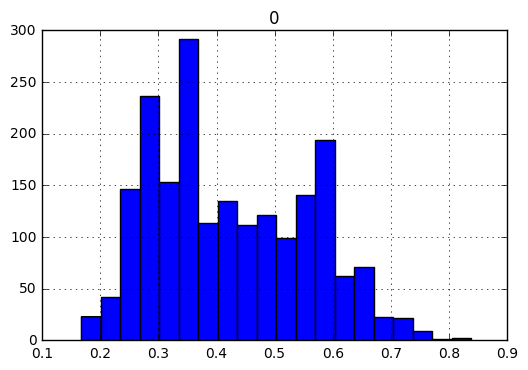

In [257]:
denselayer = model.get_layer("Dense",1)
print (denselayer.get_weights())
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_pred = model.predict_proba(test_x)
print (roc_auc_score(test_y, y_pred[:,0]))
print (y_pred)
%matplotlib inline
import pandas as pd
pd.DataFrame( y_pred[:,0]).hist(bins=20)

[0.3232036074894618, 0.21713557494363298, 0.25232820311734144, 0.13812371336143514]
[array([ 63.94422115]), array([ 74.31771395]), array([ 72.36486619]), array([ 70.52671307])]
[array([ 51.87548648]), array([ 51.00001758]), array([ 50.16668615]), array([ 39.07233152])]


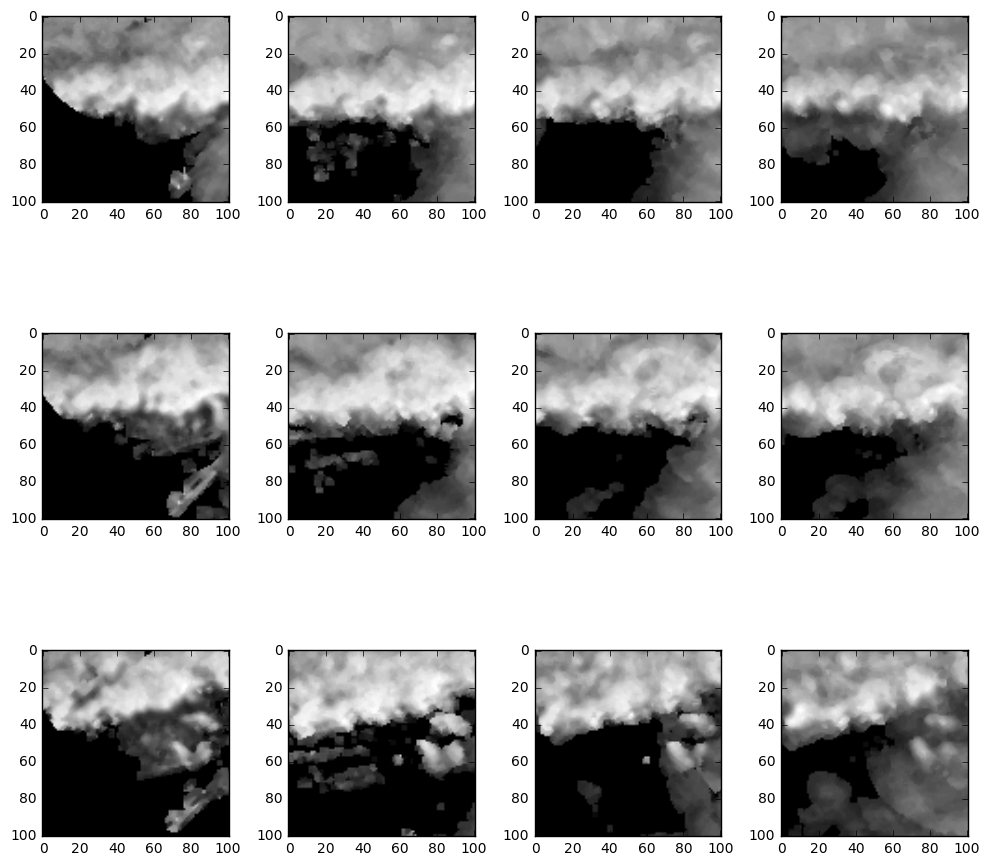

29.9


In [131]:
train_x[0].reshape([15,4,101,101])[0][0]
from matplotlib import pyplot as plt
%matplotlib inline
#index = 100
index += 1

print (
    [float(sum(train_x[index].reshape([15,4,101,101])[14][i].reshape(-1) == 0)) / (101*101) for i in range(4)]
)
print (
    [np.average(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
print (
    [np.std(train_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(3,4,figsize=(10,10))
for j in range(3):
    for i in range(4):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(train_x[index].reshape([15,4,101,101])[14-5*j][i],cmap='gray')
f.tight_layout()
plt.show()
print (train_y[index])

# try to do some feature engineer

In [196]:
[np.average(train_x[0].reshape([15,4,101,101])[0][0].reshape(-1)) for i in range(4)]


[25.484462307616901,
 25.484462307616901,
 25.484462307616901,
 25.484462307616901]

In [202]:
gap = 50
np.average(train_x[0].reshape([15,4,101,101])[0][0][50-gap:50+gap +  1,50-gap:50+gap + 1].reshape(-1))

25.484462307616901

In [230]:
list(range(14,0,-5))

[14, 9, 4]

In [272]:
class RainFallFeatures():
    def fit_and_extrace(self,tx):
        featurepandas = []
        for funs in (i  for i in dir(self) if i[:3] == 'fe_'):
             featurepandas.append(pd.DataFrame(getattr(self, funs)(tx,funs)))
        return pd.concat(featurepandas,axis=1)
    
    def fe_avg(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1))
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_std(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.std(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1))
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_zero_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_zero_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_gt50_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 50)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_gt100_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 100)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_gt150_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 100)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_gt200_ratio(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.average(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) >= 200)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    
    def fe_max(self,tx,feature_prefix):
        feature_dic = {}
        for gap in [5,15,50]:
            for heights in range(4):
                for timetag in range(14,0,-5):
                    featurename = "%s_%s_%s_%s" % (feature_prefix,gap,heights,timetag)
                    print("extracing %s" % (featurename))
                    features = [
                        np.max(item.reshape([15,4,101,101])[timetag][heights][50 - gap:51 + gap,50 - gap:51 + gap].reshape(-1) == 0)
                        for item in tx
                    ]
                    feature_dic[featurename] = features
        return feature_dic
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C8C6CF748>]], dtype=object)

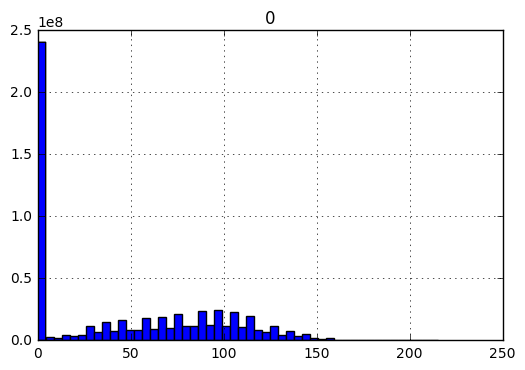

In [267]:
%matplotlib inline
#pd.DataFrame(np.asarray(train_x[:1000]).reshape(-1)).hist(bins=50)

In [273]:
rf = RainFallFeatures()
result = rf.fit_and_extrace(train_x)

extracing fe_avg_5_0_14
extracing fe_avg_5_0_9
extracing fe_avg_5_0_4
extracing fe_avg_5_1_14
extracing fe_avg_5_1_9
extracing fe_avg_5_1_4
extracing fe_avg_5_2_14
extracing fe_avg_5_2_9
extracing fe_avg_5_2_4
extracing fe_avg_5_3_14
extracing fe_avg_5_3_9
extracing fe_avg_5_3_4
extracing fe_avg_15_0_14
extracing fe_avg_15_0_9
extracing fe_avg_15_0_4
extracing fe_avg_15_1_14
extracing fe_avg_15_1_9
extracing fe_avg_15_1_4
extracing fe_avg_15_2_14
extracing fe_avg_15_2_9
extracing fe_avg_15_2_4
extracing fe_avg_15_3_14
extracing fe_avg_15_3_9
extracing fe_avg_15_3_4
extracing fe_avg_50_0_14
extracing fe_avg_50_0_9
extracing fe_avg_50_0_4
extracing fe_avg_50_1_14
extracing fe_avg_50_1_9
extracing fe_avg_50_1_4
extracing fe_avg_50_2_14
extracing fe_avg_50_2_9
extracing fe_avg_50_2_4
extracing fe_avg_50_3_14
extracing fe_avg_50_3_9
extracing fe_avg_50_3_4
extracing fe_gt100_ratio_5_0_14
extracing fe_gt100_ratio_5_0_9
extracing fe_gt100_ratio_5_0_4
extracing fe_gt100_ratio_5_1_14
extracing 

In [ ]:
result = pd.DataFrame(result)

In [277]:
result.values

array([[65.72112382934444, 38.03017689906348, 54.71904266389178, ...,
        0.05785123966942149, 1.0, 0.14049586776859505],
       [72.78147762747139, 35.07596253902185, 45.534859521331946, ..., 0.0,
        0.0, 0.0],
       [51.346514047866805, 31.684703433922998, 30.894901144641, ..., 0.0,
        0.8264462809917356, 0.256198347107438],
       ..., 
       [61.767950052029136, 81.35587929240374, 82.83766909469303, ..., 0.0,
        0.0, 0.0],
       [28.76690946930281, 0.0, 21.679500520291363, ...,
        0.19834710743801653, 0.0, 0.0],
       [85.40062434963579, 75.83246618106139, 91.02913631633714, ..., 0.0,
        0.0743801652892562, 0.05785123966942149]], dtype=object)

In [276]:
result

,fe_avg_15_0_14,fe_avg_15_0_4,fe_avg_15_0_9,fe_avg_15_1_14,fe_avg_15_1_4,fe_avg_15_1_9,fe_avg_15_2_14,fe_avg_15_2_4,fe_avg_15_2_9,fe_avg_15_3_14,...,fe_zero_ratio_5_0_9,fe_zero_ratio_5_1_14,fe_zero_ratio_5_1_4,fe_zero_ratio_5_1_9,fe_zero_ratio_5_2_14,fe_zero_ratio_5_2_4,fe_zero_ratio_5_2_9,fe_zero_ratio_5_3_14,fe_zero_ratio_5_3_4,fe_zero_ratio_5_3_9
0,65.721124,38.030177,54.719043,69.338189,12.099896,53.875130,60.864724,7.799168,42.904266,54.433923,...,0.057851,0.049587,1.000000,0.041322,0.041322,1.000000,0.107438,0.057851,1.000000,0.140496
1,72.781478,35.075963,45.534860,130.968783,91.541103,111.807492,124.178980,84.005203,99.573361,105.167534,...,0.132231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,51.346514,31.684703,30.894901,83.992716,71.847034,78.052029,79.098855,60.744017,68.343392,68.581686,...,0.479339,0.000000,0.082645,0.000000,0.000000,0.173554,0.000000,0.000000,0.826446,0.256198
3,29.864724,7.329865,17.841831,35.167534,24.659729,29.377732,26.949011,18.522373,21.920916,32.077003,...,0.933884,0.851240,0.413223,0.768595,0.958678,0.876033,0.900826,0.950413,0.661157,0.570248
4,35.124870,30.758585,34.479709,79.079084,83.380853,79.347555,83.280957,87.642040,84.873049,73.981270,...,0.628099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,56.608741,82.767950,74.032258,74.690947,93.944849,99.688866,74.879292,91.555671,98.302810,67.455775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,5.490114,13.331946,6.603538,3.570239,47.619147,18.302810,7.978148,44.972945,17.501561,26.726327,...,1.000000,1.000000,0.272727,1.000000,1.000000,0.190083,1.000000,0.537190,0.256198,0.958678
7,43.784599,27.350676,26.977107,69.637877,32.607700,43.158169,63.906348,29.956296,37.537981,47.572320,...,0.190083,0.041322,0.033058,0.380165,0.033058,0.289256,0.628099,0.082645,0.148760,0.198347
8,11.264308,11.777315,9.553590,87.854318,109.388137,92.280957,92.624350,103.669095,92.874089,81.573361,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,85.792924,103.446410,98.657648,105.261186,127.703434,119.383975,102.790843,120.048907,118.216441,96.860562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [284]:
train_labels = [1 if i >= 20 else 0 for i in train_y]

In [309]:
len(train_y),len(test_y)

(8000, 2000)

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=5)
clf.fit(result.values,train_labels)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [286]:
test_data = rf.fit_and_extrace(test_x).values

extracing fe_avg_5_0_14
extracing fe_avg_5_0_9
extracing fe_avg_5_0_4
extracing fe_avg_5_1_14
extracing fe_avg_5_1_9
extracing fe_avg_5_1_4
extracing fe_avg_5_2_14
extracing fe_avg_5_2_9
extracing fe_avg_5_2_4
extracing fe_avg_5_3_14
extracing fe_avg_5_3_9
extracing fe_avg_5_3_4
extracing fe_avg_15_0_14
extracing fe_avg_15_0_9
extracing fe_avg_15_0_4
extracing fe_avg_15_1_14
extracing fe_avg_15_1_9
extracing fe_avg_15_1_4
extracing fe_avg_15_2_14
extracing fe_avg_15_2_9
extracing fe_avg_15_2_4
extracing fe_avg_15_3_14
extracing fe_avg_15_3_9
extracing fe_avg_15_3_4
extracing fe_avg_50_0_14
extracing fe_avg_50_0_9
extracing fe_avg_50_0_4
extracing fe_avg_50_1_14
extracing fe_avg_50_1_9
extracing fe_avg_50_1_4
extracing fe_avg_50_2_14
extracing fe_avg_50_2_9
extracing fe_avg_50_2_4
extracing fe_avg_50_3_14
extracing fe_avg_50_3_9
extracing fe_avg_50_3_4
extracing fe_gt100_ratio_5_0_14
extracing fe_gt100_ratio_5_0_9
extracing fe_gt100_ratio_5_0_4
extracing fe_gt100_ratio_5_1_14
extracing 

In [306]:
predy = clf.predict_proba(test_data)[:,1]

In [307]:
test_label = [1 if i >= 20 else 0 for i in test_y]

In [308]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
auc = roc_auc_score(test_label,predy)
print (auc)

0.845192849099


In [310]:
yy = clf.predict(test_data)

In [316]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label,yy))
print(accuracy_score(train_labels,clf.predict(result.values)))

0.772
0.914375


In [349]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(max_depth=9)
reg.fit(result.values,train_y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=9, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C91134F28>]], dtype=object)

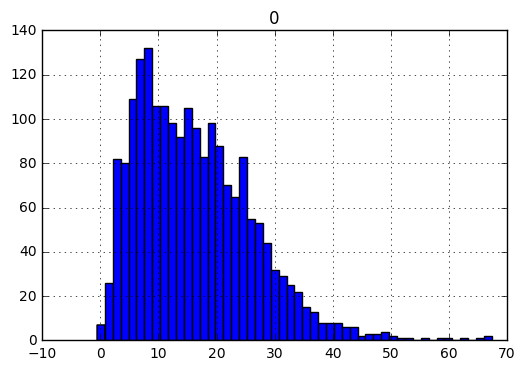

In [350]:
pd.DataFrame(reg.predict(test_data)).hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C91184F98>]], dtype=object)

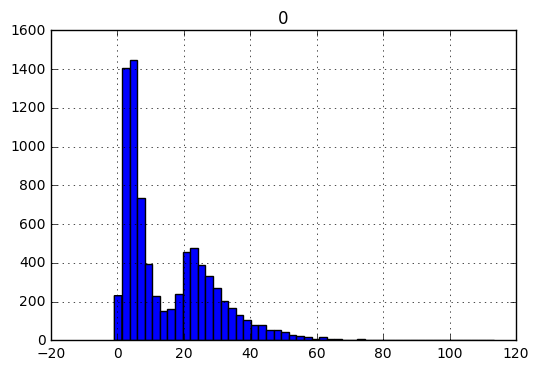

In [351]:
pd.DataFrame(reg.predict(result.values)).hist(bins=50)

In [352]:
regyy = reg.predict(test_data)
print("rsem")
np.sqrt(np.mean(np.square(np.array(regyy) - np.array(test_y))))

rsem


11.873434877313677

In [353]:
with open('onlinedata.plk','rb') as fhdl:
    predict_x = pickle.load(fhdl)

In [358]:
predict_x[0][predict_x[0] > 128]

array([131, 131, 131, ..., 137, 131, 131], dtype=uint8)

In [355]:
predictdata = rf.fit_and_extrace(predict_x)

extracing fe_avg_5_0_14
extracing fe_avg_5_0_9
extracing fe_avg_5_0_4
extracing fe_avg_5_1_14
extracing fe_avg_5_1_9
extracing fe_avg_5_1_4
extracing fe_avg_5_2_14
extracing fe_avg_5_2_9
extracing fe_avg_5_2_4
extracing fe_avg_5_3_14
extracing fe_avg_5_3_9
extracing fe_avg_5_3_4
extracing fe_avg_15_0_14
extracing fe_avg_15_0_9
extracing fe_avg_15_0_4
extracing fe_avg_15_1_14
extracing fe_avg_15_1_9
extracing fe_avg_15_1_4
extracing fe_avg_15_2_14
extracing fe_avg_15_2_9
extracing fe_avg_15_2_4
extracing fe_avg_15_3_14
extracing fe_avg_15_3_9
extracing fe_avg_15_3_4
extracing fe_avg_50_0_14
extracing fe_avg_50_0_9
extracing fe_avg_50_0_4
extracing fe_avg_50_1_14
extracing fe_avg_50_1_9
extracing fe_avg_50_1_4
extracing fe_avg_50_2_14
extracing fe_avg_50_2_9
extracing fe_avg_50_2_4
extracing fe_avg_50_3_14
extracing fe_avg_50_3_9
extracing fe_avg_50_3_4
extracing fe_gt100_ratio_5_0_14
extracing fe_gt100_ratio_5_0_9
extracing fe_gt100_ratio_5_0_4
extracing fe_gt100_ratio_5_1_14
extracing 

In [356]:
predictvals = reg.predict(predictdata.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C9145C198>]], dtype=object)

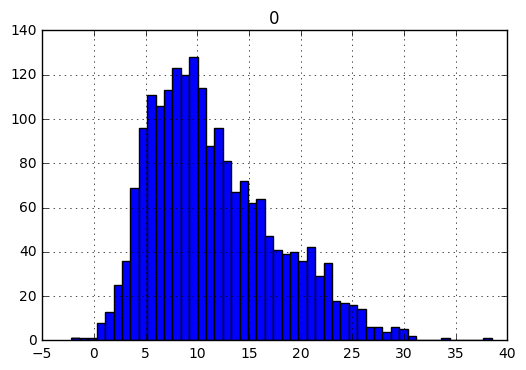

In [366]:
pd.DataFrame(predictvals).hist(bins=50)

In [360]:
np.average(predictvals)

11.594796153107817

In [363]:
np.average(reg.predict(test_data))

16.249240871570922

In [364]:
np.average(train_y)

15.472075

In [367]:
with open('answers/4_19_gbregressor_deep9.csv','w') as whdl:
    for val in predictvals:
        whdl.write("%s\n" % (val))

In [371]:
sum(np.array(predictvals) < 0)


2

# try to find out what's going on in online dataset

[0.6629742182139006, 0.005685717086560141, 0.00029408881482207626, 0.0012743848642289971]
[array([ 24.62258602]), array([ 98.24360357]), array([ 97.80796]), array([ 75.63787864])]
[array([ 38.26211838]), array([ 22.56225937]), array([ 19.21289819]), array([ 15.19158545])]


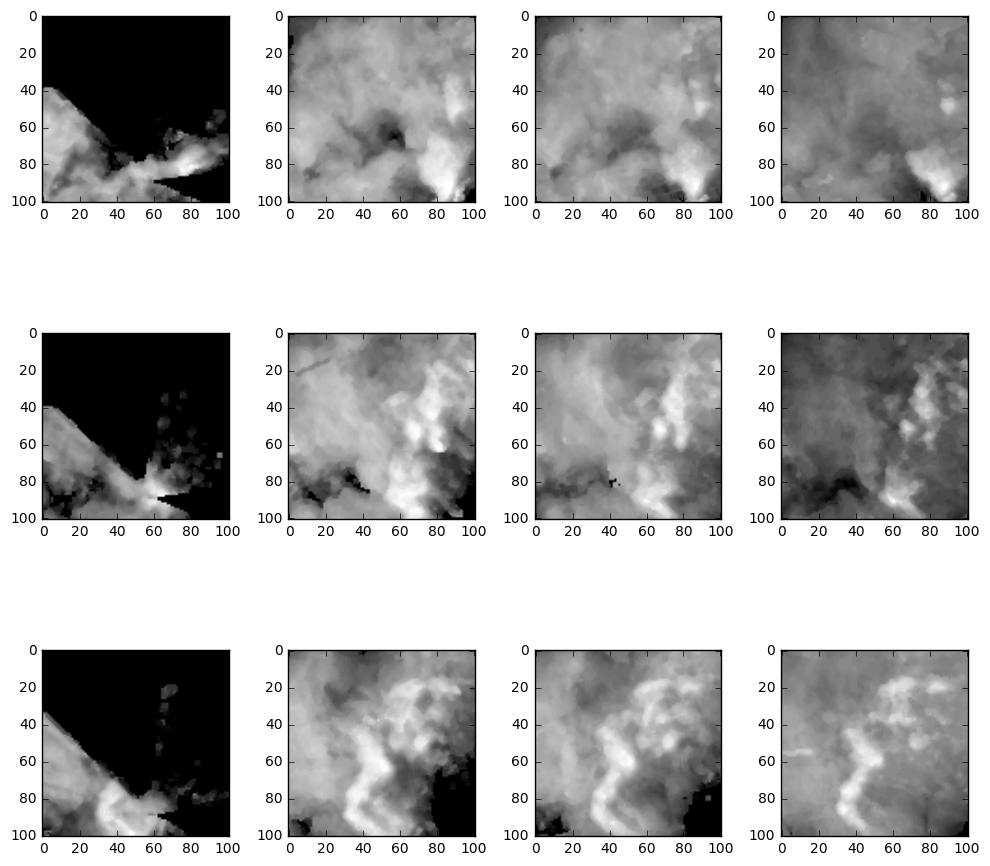

In [378]:

predict_x[0].reshape([15,4,101,101])[0][0]
from matplotlib import pyplot as plt
%matplotlib inline
#index = 100
index += 1

print (
    [float(sum(predict_x[index].reshape([15,4,101,101])[14][i].reshape(-1) == 0)) / (101*101) for i in range(4)]
)
print (
    [np.average(predict_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
print (
    [np.std(predict_x[index].reshape([15,4,101,101])[14][i]).reshape(-1) for i in range(4)]
)
plt.figure(figsize=(10,10))
f,axarr = plt.subplots(3,4,figsize=(10,10))
for j in range(3):
    for i in range(4):
        #plt.subplot(340 + j * 4 + i + 1)
        axarr[j][i].imshow(predict_x[index].reshape([15,4,101,101])[14-5*j][i],cmap='gray')
f.tight_layout()
plt.show()